# Practice your skills loading data from a CSV file
In this exercise, you will load a CSV file and you'll perform some operations on it to extract data. If you know how to do this with the Pandas library, you can use that. If not, you can use the csv library with the ready-to-use example this notebook provides.

In [ ]:
from csv import DictReader

# Open the CSV file and read it into a list of dictionaries and ignore unicode errors

with open('sample_data/wine-ratings-small.csv', encoding='utf-8', errors='ignore') as f:
    reader = DictReader(f)
    wines = list(reader)


# The wines variable is now a list of dictionaries, one for each row in the CSV file. This is the sample output of a single entry:
# {'': '1',
#  'name': 'Laurenz V Charming Gruner Veltliner 2014',
#  'grape': '',
#  'region': 'Kamptal, Austria',
#  'variety': 'White Wine',
#  'rating': '90.0',
#  'notes': ''}



Looping over the list of dictionaries can be tricky with plain Python. Specialized libraries like Pandas make this much easier but the downside is that you need to learn a new library. The following code is a bit more verbose but it's a good exercise to learn how to work with dictionaries in Python.


In [ ]:
# This example creates a new list that only has wines from Napa Valley. The new list is called napa_wines:
napa_wines = []
for wine in wines:
    if 'Napa' in wine['region']:
        napa_wines.append(wine)

napa_wines

**NOTE**: If you are trying to use ratings, remember that you will need to convert the ratings to integers for numerical comparisons.

## Using Pandas
Alternatively, you can use the Pandas library to load the CSV file and then extract the data. You'll need to install the Pandas library first. You can do this with the following command:

```bash
pip install pandas
```

Then, you can use the following code to load the CSV file and extract the data:

```python
import pandas as pd

df = pd.read_csv('sample_data/wine-ratings-small.csv')
df.head()
```

In [ ]:
import pandas as pd
df = pd.read_csv("sample_data/wine-ratings-small.csv", index_col=0) # read the csv file and set the index column to 0
df.head() # show the first 5 rows of the dataframe


## Manipulate data with Pandas or as a dictionary
At this point, you can use Pandas if you know how to use it. Otherwise, you can use the data as a dictionary. You can use the following code to extract the data:

```python
data = df.to_dict()
```

In [ ]:
dict_data = df.to_dict()
# You'll get several keys, one for each column in the dataframe. You can access the values of a column by using the column name as a key. You'll also
# get the index of each row as a key. You can access the values of a row by using the index as a key.

dict_data['name'] # get the values of the 'name' column
# sample output:
# {0: 'Laurenz V Charming Gruner Veltliner 2013',
# 1: 'Laurenz V Charming Gruner Veltliner 2014', ...}


In [ ]:
# if you want to get the values of a row, you can use the index of the row as a key, but you have to use it for every column you need. For example:
print(dict_data['name'][0], # get the value of the 'name' column for the row with index 0
dict_data['rating'][0], # get the value of the 'rating' column for the row with index 0
dict_data['region'][0], # get the value of the 'region' column for the row with index 0
)



### Assignment 1

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
df = pd.read_csv('wine-ratings-small.csv')
df.head()

,Unnamed: 0,name,grape,region,variety,rating,notes
0,0,Laurenz V Charming Gruner Veltliner 2013,NaN,"Kamptal, Austria",White Wine,90.0,Aromas of ripe apples and a typical Veltliner ...
1,1,Laurenz V Charming Gruner Veltliner 2014,NaN,"Kamptal, Austria",White Wine,90.0,Aromas of ripe apples and a typical Veltliner ...
2,2,Laurenz V Singing Gruner Veltliner 2007,NaN,Austria,White Wine,90.0,"A very attractive fruit bouquet yields apple, ..."
3,3,Laurenz V Singing Gruner Veltliner 2010,NaN,Austria,White Wine,88.0,"A very attractive fruit bouquet yields apple, ..."
4,4,Laurenz V Singing Gruner Veltliner 2011,NaN,Austria,White Wine,88.0,"A very attractive fruit bouquet yields apple, ..."


In [21]:
df.dtypes

Unnamed: 0      int64
name           object
grape         float64
region         object
variety        object
rating        float64
notes          object
dtype: object

In [22]:
df['rating'] = pd.to_numeric(df['rating'])

In [9]:
df['rating'].value_counts()

90.0    229
91.0    169
92.0    116
93.0     98
94.0     50
89.0     38
95.0     25
88.0     17
96.0     16
87.0      8
98.0      7
97.0      4
99.0      1
86.0      1
85.0      1
Name: rating, dtype: int64

In [37]:
def rating(x):
    if (85<=x<90):
        return 'Low'
    elif (90<=x<95):
        return 'Medium'
    else:
        val = 'High'
    return val

In [39]:
df['Wine_rating_range'] = df['rating'].apply(rating)

<Axes: >

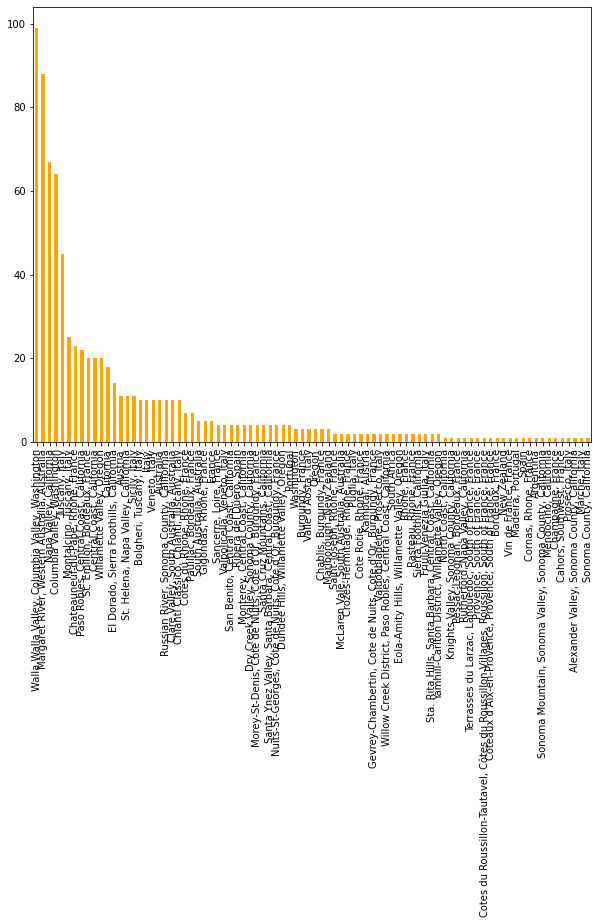

In [49]:
plt.figure(figsize=(10,8))
df['region'].value_counts().plot.bar(color='orange')

In [58]:
with open('excercise.json', "w") as file:
    json.dump(df,file)